# TEST JGV package
** This notebook contains tests for all functions contained in JGV package **

In [1]:
# For ipython inline ploting ploting
%matplotlib inline

# Larger display 
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

# Import of required packages
import pandas as pd
import pylab as pl
import pysam
from time import time

# Import functions from JGV
from JGV_helper_fun import *
from Reference import *
from Annotation import *
from Alignment import *
from Level import *
from JGV import *

### Folder setup and download test files

In [12]:
!mkdir -p "../dl_test_data/"
!wget "ftp://ftp.sanger.ac.uk/pub/gencode/Gencode_human/release_25/GRCh38.primary_assembly.genome.fa.gz" -O "../dl_test_data/GRCh38_primary.fa.gz"
!wget "ftp://ftp.sanger.ac.uk/pub/gencode/Gencode_human/release_25/gencode.v25.primary_assembly.annotation.gff3.gz" -O "../dl_test_data/gencode_v25_primary.gff3.gz"
!wget "ftp://ftp.sanger.ac.uk/pub/gencode/Gencode_human/release_25/gencode.v25.primary_assembly.annotation.gtf.gz" -O "../dl_test_data/gencode_v25_primary.gtf.gz"
!wget "ftp://ftp.sanger.ac.uk/pub/gencode/Gencode_human/release_25/gencode.v25.lncRNA_transcripts.fa.gz" -O "../dl_test_data/gencode_v25_lncRNA_transcripts.fa.gz"
!wget "ftp://ftp.sanger.ac.uk/pub/gencode/Gencode_human/release_25/gencode.v25.long_noncoding_RNAs.gff3.gz" -O "../dl_test_data/gencode_v25_lncRNA.gff3.gz"
!wget "http://fantom.gsc.riken.jp/5/suppl/Hon_et_al_2016/data/assembly/lv2_permissive/FANTOM_CAT.lv2_permissive.all_lncRNA.bed.gz" -O "../dl_test_data/FANTOM_5_all_lncRNA.bed.gz"
!wget "http://fantom.gsc.riken.jp/5/suppl/Hon_et_al_2016/data/assembly/lv2_permissive/FANTOM_CAT.lv2_permissive.all_lncRNA.gtf.gz" -O "../dl_test_data/FANTOM_5_all_lncRNA.gtf.gz"
!wget -v "http://www.ebi.ac.uk/~aleg/data/share/1M.bam" -O "../dl_test_data/1M.bam"

--2017-03-27 11:42:17--  ftp://ftp.sanger.ac.uk/pub/gencode/Gencode_human/release_25/GRCh38.primary_assembly.genome.fa.gz
           => ‘../dl_test_data/GRCh38_primary.fa.gz’
Resolving ftp.sanger.ac.uk (ftp.sanger.ac.uk)... 193.62.203.17
Connecting to ftp.sanger.ac.uk (ftp.sanger.ac.uk)|193.62.203.17|:21... connected.
Logging in as anonymous ... Logged in!
==> SYST ... done.    ==> PWD ... done.
==> TYPE I ... done.  ==> CWD (1) /pub/gencode/Gencode_human/release_25 ... done.
==> SIZE GRCh38.primary_assembly.genome.fa.gz ... 844691642
==> PASV ... done.    ==> RETR GRCh38.primary_assembly.genome.fa.gz ... done.
Length: 844691642 (806M) (unauthoritative)

GRCh38.primary_asse 100%[===================>] 805.56M  24.5MB/s    in 30s     

2017-03-27 11:42:47 (27.1 MB/s) - ‘../dl_test_data/GRCh38_primary.fa.gz’ saved [844691642]

--2017-03-27 11:42:47--  ftp://ftp.sanger.ac.uk/pub/gencode/Gencode_human/release_25/gencode.v25.primary_assembly.annotation.gff3.gz
           => ‘../dl_test_data/

**Expand BAM to SAM using samtools**

In [12]:
!samtools view -h "../dl_test_data/1M.bam" > "../dl_test_data/1M.sam"
!samtools view -h "../dl_test_data/1M.bam" | head -n 100197 > "../dl_test_data/100k.sam"
!samtools view "../dl_test_data/1M.bam" > "../dl_test_data/1M_no_header.sam"

samtools view: writing to standard output failed: Broken pipe
samtools view: error closing standard output: -1


In [7]:
!ls -l "../dl_test_data/"

total 1287848
-rw-rw-r-- 1 aleg aleg  98262031 Feb  6 16:58 1M.bam
-rw-rw-r-- 1 aleg aleg  10163815 Mar 27 16:35 1M.bed.gz
-rw-rw-r-- 1 aleg aleg 257702066 Mar 27 16:43 1M.sam
-rw-rw-r-- 1 aleg aleg   4311175 Mar 22 08:21 FANTOM_5_all_lncRNA.bed.gz
-rw-rw-r-- 1 aleg aleg   7530977 Mar 22 08:21 FANTOM_5_all_lncRNA.gtf.gz
-rw-rw-r-- 1 aleg aleg   3255620 Mar 27 11:42 gencode_v25_lncRNA.gff3.gz
-rw-rw-r-- 1 aleg aleg   7230335 Mar 27 11:42 gencode_v25_lncRNA_transcripts.fa.gz
-rw-rw-r-- 1 aleg aleg  46752876 Mar 27 11:42 gencode_v25_primary.gff3.gz
-rw-rw-r-- 1 aleg aleg  38827267 Mar 27 11:42 gencode_v25_primary.gtf.gz
-rw-rw-r-- 1 aleg aleg 844691642 Mar 27 11:42 GRCh38_primary.fa.gz


---

# JGV_helper_fun

## extensions

In [9]:
help (extensions)

Help on function extensions in module JGV_helper_fun:

extensions(fp)
    Return the extension of a file in lower-case.
    If the file is gziped the method will output the base extension + the archive extension



In [3]:
extensions("./JGV_Test_Notebook.ipynb")

['ipynb']

In [4]:
extensions("../test_data/GRCh38_primary.fa.gz")

['fa', 'gz']

In [5]:
extensions("../test_data/GRCh38_primary")

[]

## file_basename

In [8]:
help(file_basename)

Help on function file_basename in module JGV_helper_fun:

file_basename(fp)
    Return the base name of a file without extension nor path.
    If the file is gziped the method will output the name without extension + the archive extension



In [12]:
file_basename("./Annotation.py")

'Annotation'

In [15]:
file_basename("../test_data/10M_sample.bam")

'10M_sample'

In [16]:
file_basename("../test_data/NONCODE2016_human_hg38_lncRNA_sorted.gtf.gz")

'NONCODE2016_human_hg38_lncRNA_sorted'

## dir_path

In [7]:
help(dir_path)

Help on function dir_path in module JGV_helper_fun:

dir_path(fp)
    Return the directory path of a file



In [6]:
dir_path("../test_data/NONCODE2016_human_hg38_lncRNA_sorted.gtf.gz")

'../test_data'

In [18]:
dir_path("./JGV.py")

'.'

## color_palette

In [10]:
help(color_palette)

Help on function color_palette in module JGV_helper_fun:

color_palette(n, colormap='brg')
    Return a list of n length with gradient colors from a given matplot lib colormap palette
    * n         Number of color scalar in the list
    * colormap  colormap color palette from matplotlib package.
                See http://matplotlib.org/examples/color/colormaps_reference.html
                example : inferno magma hot blues cool spring winter brg ocean hsv jet ... [DEFAULT: brg]



In [11]:
c= color_palette (n=10, colormap="viridis")
print(c)

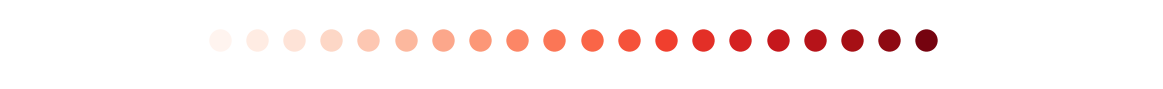

In [12]:
c= color_palette (n=20, colormap="Reds")
pl.figure(figsize=(20,1))
pl.axis("off")
for i, color in enumerate(c):
    pl.scatter(i, 1, c=color, linewidths=0, s=500)

## jprint

In [16]:
help(jprint)

Help on function jprint in module JGV_helper_fun:

jprint(*args, **kwargs)
    Format a string in HTML and print the output. Equivalent of print, but highly customizable
    Many options can be passed to the function.
    * args
        One or several objects that can be cast in str
    ** kwargs
        Formatting options to tweak the html rendering 
        Boolean options : bold, italic, highlight, underlined, striked, subscripted, superscripted
        String oprions: font, color, size, align, background_color



In [51]:
jprint("This", "Function", "is", "better than the default print", bold=True, font="Serif")

In [70]:
jprint("This <b>Function</b> is better\n than the default print", color="blue", align="center", size = 200)

# Reference

In [2]:
help(Reference)

Help on class Reference in module Reference:

class Reference(builtins.object)
 |  Parse a fasta reference file or a fasta index and save the list of reference sequences ids and their lengths
 |  
 |  Methods defined here:
 |  
 |  __init__(self, fp, name=None, verbose=False, ref_list=[], output_index=False)
 |       * fp
 |          A fasta file containing the reference sequences OR an tab separated index file containing at least 2 columns
 |          with the refid and the length in bases (like a .fa.fai file generated by samtools faidx, or with the
 |          output_index option of this function)
 |          The fasta option will take more time as the file has to be parsed to get the refid and length of sequences.
 |          Both fasta and infex file can be gziped
 |      *  name
 |          Name of the data file that will be used as track name for plotting. If not given, will be deduced from fp
 |          file name
 |      * verbose
 |          If True, will print more informati

**Test the instanciation of the Reference class from a fasta files**

In [6]:
l = ['ERCC-00104', 'ERCC-00033', 'ERCC-00025', 'ERCC-00116', 'ERCC-00014', 'ERCC-00099', 'ERCC-00044', 'ERCC-00098', 'ERCC-00031', 'ERCC-00069', 'ERCC-00058']
r = Reference ("../test_data/ERCC.fa.gz", verbose=True, ref_list=l, output_index=True)
print(r)

In [10]:
l = ['chr1', 'chr2', 'chr3', 'chr4', 'chr5', 'chr6', 'chr7', 'chr8', 'chr9', 'chr10', 'chr11', 'chr12', 'chr13', 'chr14', 'chr15', 'chr16', 'chr17', 'chr18', 'chr19', 'chr20', 'chr21', 'chr22', 'chrX', 'chrY', 'chrM']
r = Reference ("../dl_test_data/GRCh38_primary.fa.gz", verbose=True, ref_list=l, output_index=True)
print(r)

**Test the instanciation of the Reference class from a fasta index**

In [2]:
l = ['ERCC-00104', 'ERCC-00033', 'ERCC-00025']
r = Reference ("../test_data/ERCC.tsv", verbose=True, ref_list=l)
print(r)

In [2]:
r = Reference ("../dl_test_data/GRCh38_primary.tsv", verbose=True)
print(r)

**Test property methods**

In [2]:
r = Reference ("../dl_test_data/GRCh38_primary.tsv")

print ("Number of refid: ", r.refid_count)
print ("List of refid:\n", r.refid_list)

**Test get_refid_len method** 

In [3]:
r = Reference ("../dl_test_data/GRCh38_primary.tsv")
r.get_refid_len("chr8")

145138636

In [4]:
r = Reference ("../dl_test_data/GRCh38_primary.tsv")
r.get_refid_len("chrINVALID")

# Level

In [2]:
help(Level)

Help on class Level in module Level:

class Level(builtins.object)
 |  Compute the level of a given feature on the Annotation track to avoid annotation overlaping
 |  
 |  Methods defined here:
 |  
 |  __call__(self, ID, start, end, strand)
 |      Compute the level of an annnotation feature based on the instance options and the other feautures previously
 |      analysed, to avoid overlapping. Iterative call of the function has to be done with annotation features sorted
 |      by start coordinates.
 |      * ID
 |          Name of the feature to fit in a level
 |      * start
 |          Start coordinate of the feature to fit in a level, on the positive strand
 |      * end
 |          End coordinate of the feature to fit in a level, on the positive strand
 |      * strand
 |          Strand of the feature. Can be + - or None
 |  
 |  __init__(self, max_depth=10, offset=10, filter_pos=False, filter_neg=False, filter_unstrand=True)
 |      Define general options for Level class
 |   

**Test instanciation**

In [11]:
l = Level (max_depth=3, offset=10, filter_pos=False, filter_neg=False, filter_unstrand=True)
print(l)

**Test object calling with various values of features**

All should be valid except 4 and 10 

In [12]:
print(l(ID="1", start=10, end=20, strand="+"))
print(l(ID="2", start=12, end=22, strand="+"))
print(l(ID="3", start=14, end=24, strand="+"))
print(l(ID="4", start=23, end=26, strand="+"))
print(l(ID="5", start=14, end=24, strand="-"))
print(l(ID="6", start=27, end=43, strand="-"))
print(l(ID="7", start=27, end=48, strand="-"))
print(l(ID="8", start=54, end=76, strand="-"))
print(l(ID="9", start=54, end=76, strand="+"))
print(l(ID="10", start=54, end=76, strand="."))

Visualize changes in object self variable after calling

In [13]:
print(l)

**Alternative instanciation**

All should be valid except 3,5,6,7 and 8 

In [17]:
l = Level (max_depth=2, offset=2, filter_pos=False, filter_neg=True, filter_unstrand=False)

print(l(ID="1", start=10, end=20, strand="+"))
print(l(ID="2", start=12, end=22, strand="+"))
print(l(ID="3", start=14, end=24, strand="+"))
print(l(ID="4", start=23, end=26, strand="+"))
print(l(ID="5", start=14, end=24, strand="-"))
print(l(ID="6", start=27, end=43, strand="-"))
print(l(ID="7", start=27, end=48, strand="-"))
print(l(ID="8", start=54, end=76, strand="-"))
print(l(ID="9", start=54, end=76, strand="."))
print(l(ID="10", start=54, end=76, strand="."))

**Try the object properties**

In [18]:
l.max_level

2

In [19]:
l.min_level

0

In [20]:
l.n_level

3

# Annotation

In [3]:
help(Annotation)

Help on class Annotation in module Annotation:

class Annotation(builtins.object)
 |  Parse data from a file containing genomic annotation in GFF3, GTF or BED format.
 |  Can return the list of annotations for a given interval
 |  
 |  Methods defined here:
 |  
 |  __init__(self, fp, name=None, verbose=False, ref_list=[])
 |       * fp
 |          An URL to a standard genomic file containing features annotations among the following format:
 |            gff3: http://www.ensembl.org/info/website/upload/gff3.html
 |            gtf:  http://www.ensembl.org/info/website/upload/gff.html
 |            bed:  http://www.ensembl.org/info/website/upload/bed.html
 |          Valid URL schemes include http, ftp, s3, and file.
 |          The file can eventually be compressed in ‘gzip’, ‘bz2’, ‘zip’ or ‘xz’
 |      *  name
 |          Name of the data file that will be used as track name for plotting. If not given, will be deduced from fp
 |          file name  [ DEFAULT: None ]
 |      * verbose


**Test instantiation**

In [3]:
file_list = [
    "../dl_test_data/FANTOM_5_all_lncRNA.bed.gz",
    "../dl_test_data/FANTOM_5_all_lncRNA.gtf.gz",
    "../dl_test_data/gencode_v25_lncRNA.gff3.gz",
    "../dl_test_data/gencode_v25_primary.gff3.gz",
    "../dl_test_data/gencode_v25_primary.gtf.gz" ]

ref_list = ["chr1", "chr2", "chr3", "chr4", "chr5", "chr6", "chr7", "chr8", "chr9", "chr10", "chr11", "chr12", "chr13", "chr14", "chr15", "chr16", "chr17", "chr18", "chr19", "chr20", "chr21", "chrX", "chrY", "chrM"]

for fp in file_list:
    a = Annotation (fp, verbose=True, ref_list=ref_list)
    print (a)

**Test property methods**

In [4]:
a = Annotation ("../dl_test_data/FANTOM_5_all_lncRNA.gtf.gz", ref_list = ["chr21", "chrX", "chrY", "chrM"])

print ("feature count:", a.feature_count)
print ("refid count:", a.refid_count)
print ("type count:", a.type_count)

display(a.refid_list)
display(a.type_list)
display(a.refid_count_uniq.head())
display(a.type_count_uniq.head())

['chr21', 'chrX', 'chrY']

['exon', 'gene', 'transcript']

,count
refid,
chrX,18119
chr21,10177
chrY,1355


,count
type,
exon,18542
transcript,8084
gene,3025


In [5]:
a = Annotation ("../dl_test_data/gencode_v25_primary.gff3.gz", ref_list = ["chr21", "chrX", "chrY", "chrM"])

print ("feature count:", a.feature_count)
print ("refid count:", a.refid_count)
print ("type count:", a.type_count)

display(a.refid_list)
display(a.type_list)
display(a.refid_count_uniq.head())
display(a.type_count_uniq.head())

['chr21', 'chrM', 'chrX', 'chrY']

['exon',
 'CDS',
 'gene',
 'transcript',
 'stop_codon',
 'three_prime_UTR',
 'five_prime_UTR',
 'start_codon']

,count
refid,
chrX,80432
chr21,28902
chrY,9135
chrM,138


,count
type,
exon,53953
CDS,32193
transcript,9385
five_prime_UTR,6856
three_prime_UTR,5158


**test the interval_features method**

In [6]:
a = Annotation ("../dl_test_data/FANTOM_5_all_lncRNA.bed.gz", verbose=True)

In [7]:
a.interval_features("chrX", start=70723, end=1456774, feature_type=None).head()

,refid,start,end,strand,ID,type
0,chrX,70225,70724,+,CATG00000110193.1|HBMT00001528801.1,unknown
1,chrX,70225,71012,+,CATG00000110193.1|ENCT00000463832.1,unknown
2,chrX,70225,71610,+,CATG00000110193.1|ENCT00000463833.1,unknown
3,chrX,184125,192877,-,CATG00000112915.1|ENCT00000473979.1,unknown
4,chrX,192544,192877,-,CATG00000112915.1|FTMT29000000005.1,unknown


In [8]:
a.interval_features("chrX", start=71011, end=200000, feature_type=["exon"]).head()

,refid,start,end,strand,ID,type


In [9]:
a = Annotation ("../dl_test_data/FANTOM_5_all_lncRNA.gtf.gz", verbose=True)

In [10]:
a.interval_features("chrX", start=71011, end=200000, feature_type=["exon", "transcript"]).head()

,refid,start,end,strand,ID,type
0,chrX,70226,71012,+,CATG00000110193.1,transcript
1,chrX,70226,71012,+,CATG00000110193.1,exon
2,chrX,70226,71610,+,CATG00000110193.1,transcript
3,chrX,70226,71610,+,CATG00000110193.1,exon
4,chrX,184126,184535,-,CATG00000112915.1,exon


In [11]:
a.interval_features("chrX", start=71011, end=200000, feature_type="CDS").head()

,refid,start,end,strand,ID,type


In [12]:
a.interval_features("chrINVALID", start=71011, end=200000, feature_type=["exon"]).head()

,refid,start,end,strand,ID,type


In [13]:
a.interval_features("chrX", start=200000, end=10000).head()

,refid,start,end,strand,ID,type


# Alignment

In [2]:
help(Alignment)

Help on class Alignment in module Alignment:

class Alignment(builtins.object)
 |  Parse data and compute the base resolution coverage from a file containing aligned reads in BAM, SAM or BED format.
 |  Can return the coverage for a given interval
 |  
 |  Methods defined here:
 |  
 |  __init__(self, fp, name=None, verbose=False, min_coverage=5, ref_list=[], output_bed=False)
 |       * fp
 |           A standard BAM or SAM (http://samtools.sourceforge.net/SAM1.pdf) containing aligned reads and a standard
 |           header. The files do not need to be sorted or indexed.
 |           One can also use a 6 fields bed (chrom, chromStart, chromEnd, name, score, strand (Much faster than from a
 |           Bam/Sam file, can be gzipped). http://www.ensembl.org/info/website/upload/bed.html
 |      *  name
 |          Name of the data file that will be used as track name for plotting. If not given, will be deduced from fp
 |          file name  [ DEFAULT: None ]
 |      * verbose
 |         

**Test instantiation from BAM, SAM and BED files**

In [3]:
file_list = ["../dl_test_data/1M.bam", "../dl_test_data/1M.sam","../dl_test_data/100k.sam", "../dl_test_data/1M.bed.gz", "../dl_test_data/100k.bed.gz"]
l = ['chr1', 'chr2', 'chr3', 'chr4', 'chr5', 'chr6', 'chr7', 'chr8', 'chr9', 'chr10', 'chr11', 'chr12', 'chr13', 'chr14', 'chr15', 'chr16', 'chr17', 'chr18', 'chr19', 'chr20', 'chr21', 'chr22', 'chrX', 'chrY', 'chrM']

for fp in file_list:
    s = time()
    print(Alignment (fp, verbose=True, ref_list=l, min_coverage=5, output_bed=True))
    print ("Execution time = ", round(time()-s, 2), "s")

**Suposed to fail if no header in the sam/bam file**

In [2]:
a = Alignment (fp="../dl_test_data/1M_no_header.sam", verbose=True)

ValueError: file has no sequences defined (mode='r') - is it SAM/BAM format? Consider opening with check_seq=True

**Test property methods**

In [5]:
a = Alignment (fp="../dl_test_data/1M.bed.gz", verbose=True)
print ("Number of refid: ", a.refid_count)
print ("List of refid:\n", a.refid_list)
print ("Base coverage of the reference sequence:\n", a.refid_nbases)

In [6]:
l = ['chr16', 'chr17', 'chr18', 'chr19', 'chr20', 'chr21', 'chr22', 'chrX', 'chrY', 'chrM']
a = Alignment (fp="../dl_test_data/1M.bam", verbose=True, ref_list=l)
print ("Number of refid: ", a.refid_count)
print ("List of refid:\n", a.refid_list)
print ("Base coverage of the reference sequence:\n", a.refid_nbases)

**test interval_coverage method**

In [7]:
a = Alignment (fp="../dl_test_data/1M.bed.gz", verbose=True)

,+,-
500,0,0
547,0,0
595,0,0
642,165,0
690,228,8


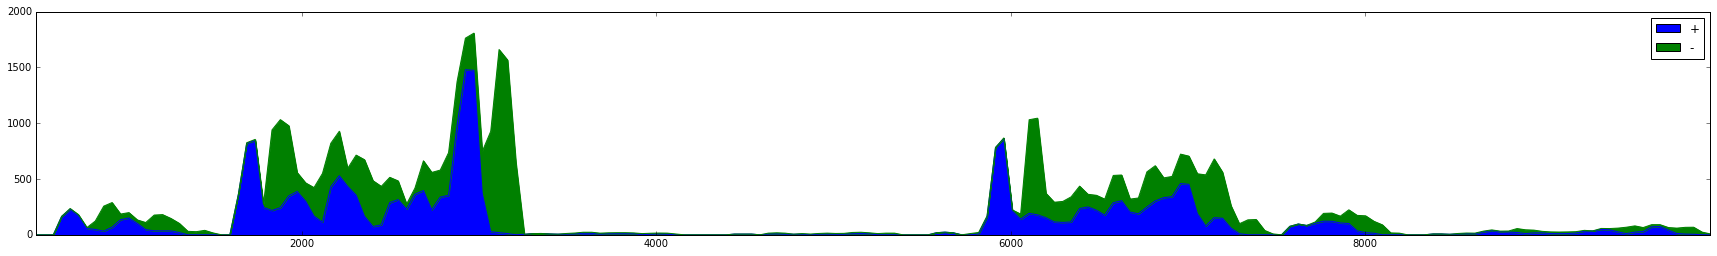

In [8]:
df = a.interval_coverage(refid="chrM", start=500, end=10000, bins=200, bin_repr_fun='max')
display(df.head(5))
df.plot.area(figsize=(30, 4))

,+,-
0,0.03275,0.0320333
600000,0.194345,0.196758
1200000,0.167758,0.156655
1800000,0.000535,0.000838333
2400000,0.00483333,0.00194667


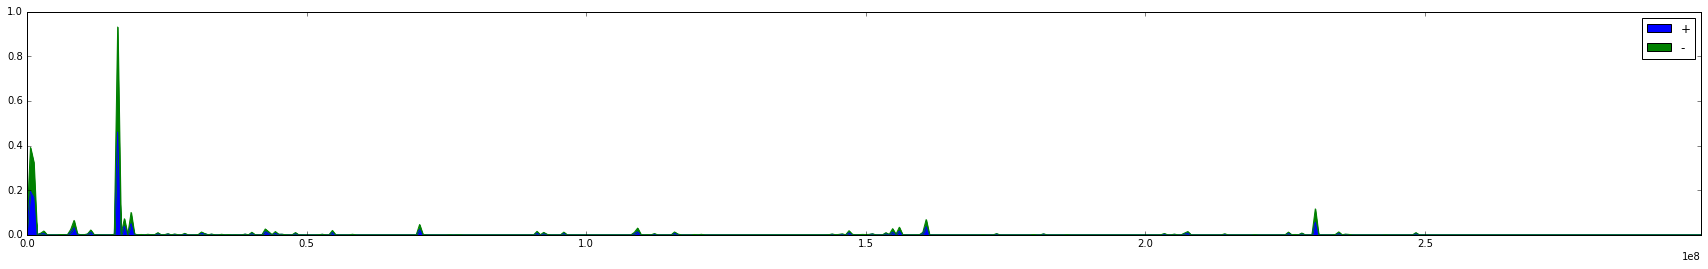

In [9]:
df = a.interval_coverage(refid="chr1", start=0, end=300000000, bins=500, bin_repr_fun='mean')
display(df.head(5))
df.plot.area(figsize=(30, 4))

,+,-
0,0,0
600000,0,0
1200000,0,0
1800000,0,0
2400000,0,0


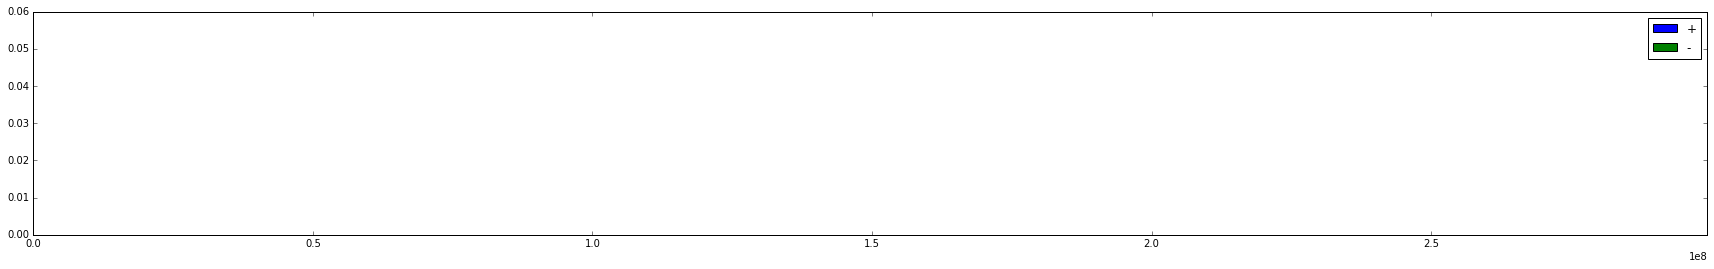

In [10]:
df = a.interval_coverage(refid="chr47", start=0, end=300000000)
display(df.head(5))
df.plot.area(figsize=(30, 4))

,+,-
1997,0,0
2951,0,0
3906,0,0
4861,0,0
5816,0,0


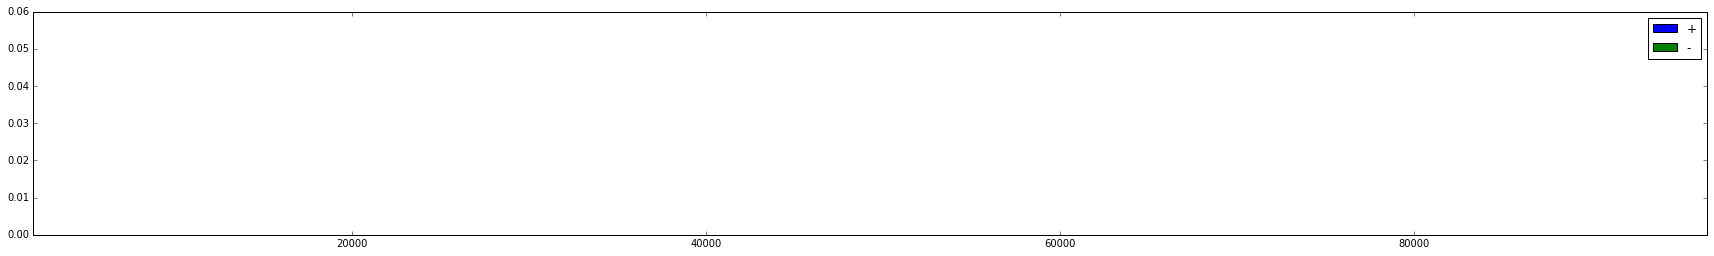

In [11]:
df = a.interval_coverage(refid="chr7", start=1997, end=97495, bins=100, bin_repr_fun='max')
display(df.head(5))
df.plot.area(figsize=(30, 4))

# JGV

In [4]:
help(JGV)

Help on class JGV in module JGV:

class JGV(builtins.object)
 |  Methods defined here:
 |  
 |  __init__(self, fp, name=None, verbose=False, ref_list=[], output_index=False)
 |       * fp
 |          A fasta file containing the reference sequences OR an tab separated index file containing at least 2 columns
 |          with the seqid and the length in bases (like a .fa.fai file generated by samtools faidx).
 |          The fasta option will take more time as the file has to be parsed to get the seqid and length of sequences.
 |          A 2 column index tsv file will be automatically generated for latter usage as an index file.
 |          Both fasta and infex file can be gziped
 |      *  name
 |          Name of the data file that will be used as track name for plotting. If not given, will be deduced from fp
 |          file name
 |      * verbose
 |          If True, will print more information during initialisation and calls of all the object methods.
 |  
 |  __str__(self)
 |     

**Test Instantiation**

In [2]:
fp = "../dl_test_data/GRCh38_primary.tsv"
l = ['chr1', 'chr2', 'chr3', 'chr4', 'chr5', 'chr6', 'chr7', 'chr8', 'chr9', 'chr10', 'chr11', 'chr12', 'chr13', 'chr14', 'chr15', 'chr16', 'chr17', 'chr18', 'chr19', 'chr20', 'chr21', 'chr22', 'chrX', 'chrY', 'chrM']
j = JGV(fp=fp, ref_list=l, verbose=True)

In [3]:
j.add_annotation("../dl_test_data/gencode_v25_primary.gff3.gz")

In [4]:
j.add_annotation("../dl_test_data/FANTOM_5_all_lncRNA.gtf.gz")

/home/aleg/Programming/Python3/JupyterGenoViewer/JGV/JGV.py:117: UserWarning: No annotation found for chrM
  warnings.warn("No annotation found for {}".format(refid))


In [5]:
j.add_alignment("../dl_test_data/1M.bed.gz")

In [6]:
j.add_alignment("../dl_test_data/100k.sam")

In [7]:
print(j)

**Test the annotation_summary function without and with annotation track**

In [5]:
# create an empty jgv instance
fp = "../dl_test_data/GRCh38_primary.tsv"
l = ['chr1', 'chr2', 'chr3', 'chr4', 'chr5', 'chr6', 'chr7', 'chr8', 'chr9', 'chr10', 'chr11', 'chr12', 'chr13', 'chr14', 'chr15', 'chr16', 'chr17', 'chr18', 'chr19', 'chr20', 'chr21', 'chr22', 'chrX', 'chrY', 'chrM']

# JGV object with 2 annotations and 2 alignment tracks
j = JGV(fp=fp, ref_list=l)
j.add_annotation("../dl_test_data/FANTOM_5_all_lncRNA.gtf.gz")
j.add_annotation("../dl_test_data/gencode_v25_lncRNA.gff3.gz")
j.add_alignment("../dl_test_data/1M.bed.gz")
j.add_alignment("../dl_test_data/100k.bed.gz")

# Empty JGV object
j2 = JGV(fp=fp, ref_list=l)

In [6]:
j.annotation_summary()

,Feature count,Refid count,Feature type count
FANTOM_5_all_lncRNA,639324.0,24.0,3.0
gencode_v25_lncRNA,126383.0,24.0,3.0


,FANTOM_5_all_lncRNA,gencode_v25_lncRNA
refid,,
chr1,53694,10896
chr10,28426,5201
chr11,27163,5558
chr12,31213,6458
chr13,18958,3554
chr14,23327,4259
chr15,24038,5065
chr16,20408,5446
chr17,24604,6194


,FANTOM_5_all_lncRNA,gencode_v25_lncRNA
type,,
exon,401161,82924
transcript,175031,27692
gene,63132,15767


In [7]:
j2.annotation_summary()

/home/aleg/Programming/Python3/JupyterGenoViewer/JGV/JGV.py:172: UserWarning: No annotation track loaded
  warnings.warn("No annotation track loaded")


**Test the alignment_summary function without and with alignment track**

In [8]:
j.alignment_summary()

,Refid count,Base coverage
1M,25.0,24786158.0
100k,24.0,989837.0


,1M,100k
chr1,1672759,75763.0
chr10,354604,7164.0
chr11,963085,27229.0
chr12,888997,36391.0
chr13,91130,931.0
chr14,969619,32674.0
chr15,299921,1703.0
chr16,1905311,27312.0
chr17,1317502,13445.0
chr18,39978,60.0


In [9]:
j2.alignment_summary()

/home/aleg/Programming/Python3/JupyterGenoViewer/JGV/JGV.py:200: UserWarning: No alignment track loaded
  warnings.warn("No alignment track loaded")


**Test refid_coverage_plot**

In [5]:
# Create fast instances of IGV
fp = "../dl_test_data/GRCh38_primary.tsv"
l = ['chr1', 'chr2', 'chr3', 'chr4', 'chr5', 'chr6', 'chr7', 'chr8', 'chr9', 'chr10', 'chr11', 'chr12', 'chr13', 'chr14', 'chr15', 'chr16', 'chr17', 'chr18', 'chr19', 'chr20', 'chr21', 'chr22', 'chrX', 'chrY', 'chrM']

# JGV object with 2 annotations and 2 alignment tracks
j = JGV(fp=fp, ref_list=l)
j.add_annotation("../dl_test_data/FANTOM_5_all_lncRNA.gtf.gz")
j.add_annotation("../dl_test_data/gencode_v25_lncRNA.gff3.gz")
j.add_alignment("../dl_test_data/1M.bed.gz")
j.add_alignment("../dl_test_data/100k.bed.gz")

# Empty JGV object
j2 = JGV(fp=fp, ref_list=l)

,1M,100k
chr1,0.271082,0.307447
chr10,0.106927,0.054093
chr11,0.287636,0.203637
chr12,0.269117,0.275855
chr13,0.032149,0.008224
chr14,0.365452,0.308374
chr15,0.118641,0.016869
chr16,0.850912,0.305434
chr17,0.638438,0.163145
chr18,0.020068,0.000754


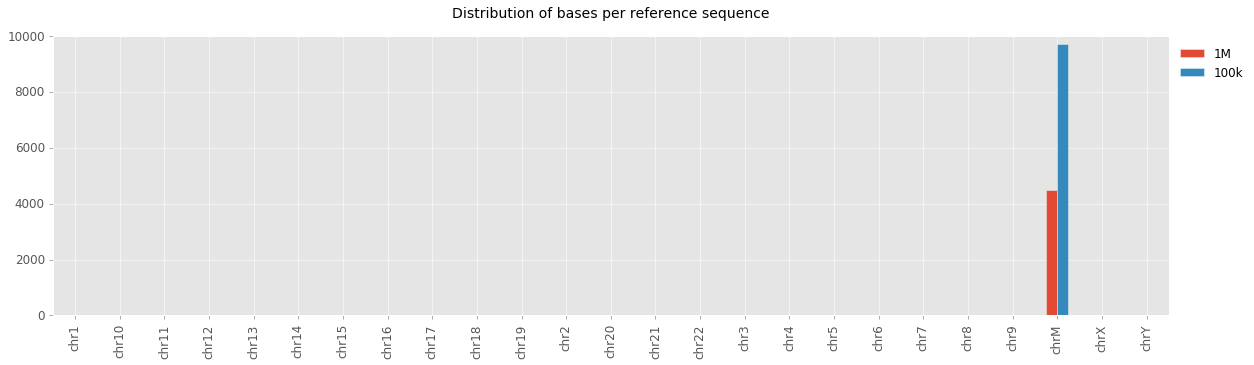

In [3]:
j.refid_coverage_plot()

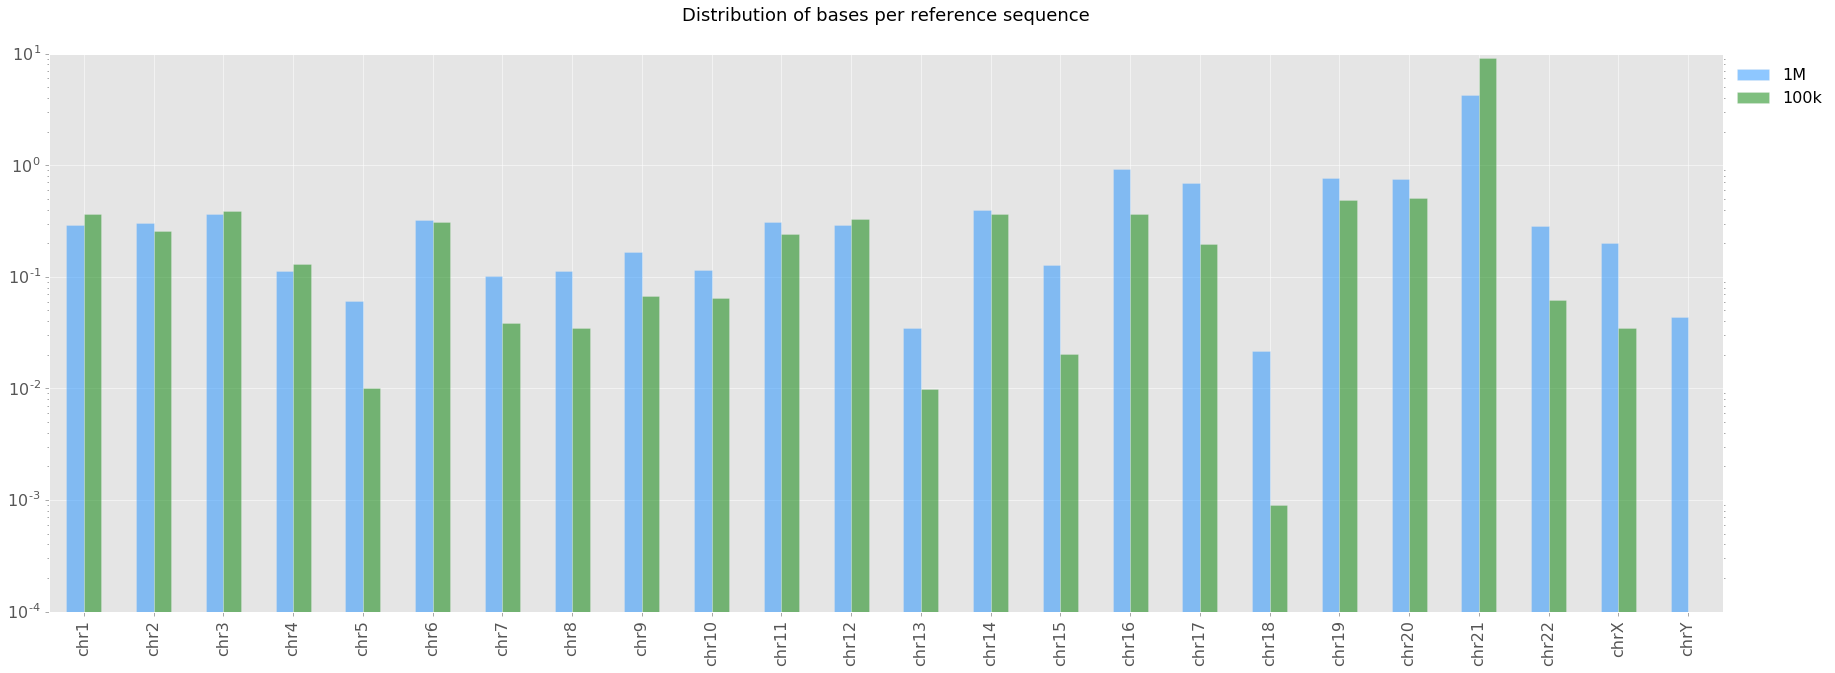

In [6]:
r = j.refid_coverage_plot(
    norm_depth = True,
    norm_len =  True,
    plot_style="ggplot",
    figwidth = 30,
    figheight = 10, 
    log = True,
    ref_list = ['chr1', 'chr2', 'chr3', 'chr4', 'chr5', 'chr6', 'chr7', 'chr8', 'chr9', 'chr10', 'chr11', 'chr12', 'chr13', 'chr14', 'chr15', 'chr16', 'chr17', 'chr18', 'chr19', 'chr20', 'chr21', 'chr22', 'chrX', 'chrY'],
    color=("dodgerblue", "green"),
    alpha=0.5,
    fontsize=16)

**Test interval_plot**

In [4]:
# Create fast instances of IGV
fp = "../dl_test_data/GRCh38_primary.tsv"
l = ['chr1', 'chr2', 'chr3', 'chr4', 'chr5', 'chr6', 'chr7', 'chr8', 'chr9', 'chr10', 'chr11', 'chr12', 'chr13', 'chr14', 'chr15', 'chr16', 'chr17', 'chr18', 'chr19', 'chr20', 'chr21', 'chr22', 'chrX', 'chrY', 'chrM']

# JGV object with 2 annotations and 2 alignment tracks
j = JGV(fp=fp, ref_list=l)
#j.add_annotation("../dl_test_data/FANTOM_5_all_lncRNA.gtf.gz")
#j.add_annotation("../dl_test_data/gencode_v25_lncRNA.gff3.gz")
j.add_alignment("../dl_test_data/1M.bed.gz")
j.add_alignment("../dl_test_data/100k.bed.gz")

# Empty JGV object
j2 = JGV(fp=fp, ref_list=l)

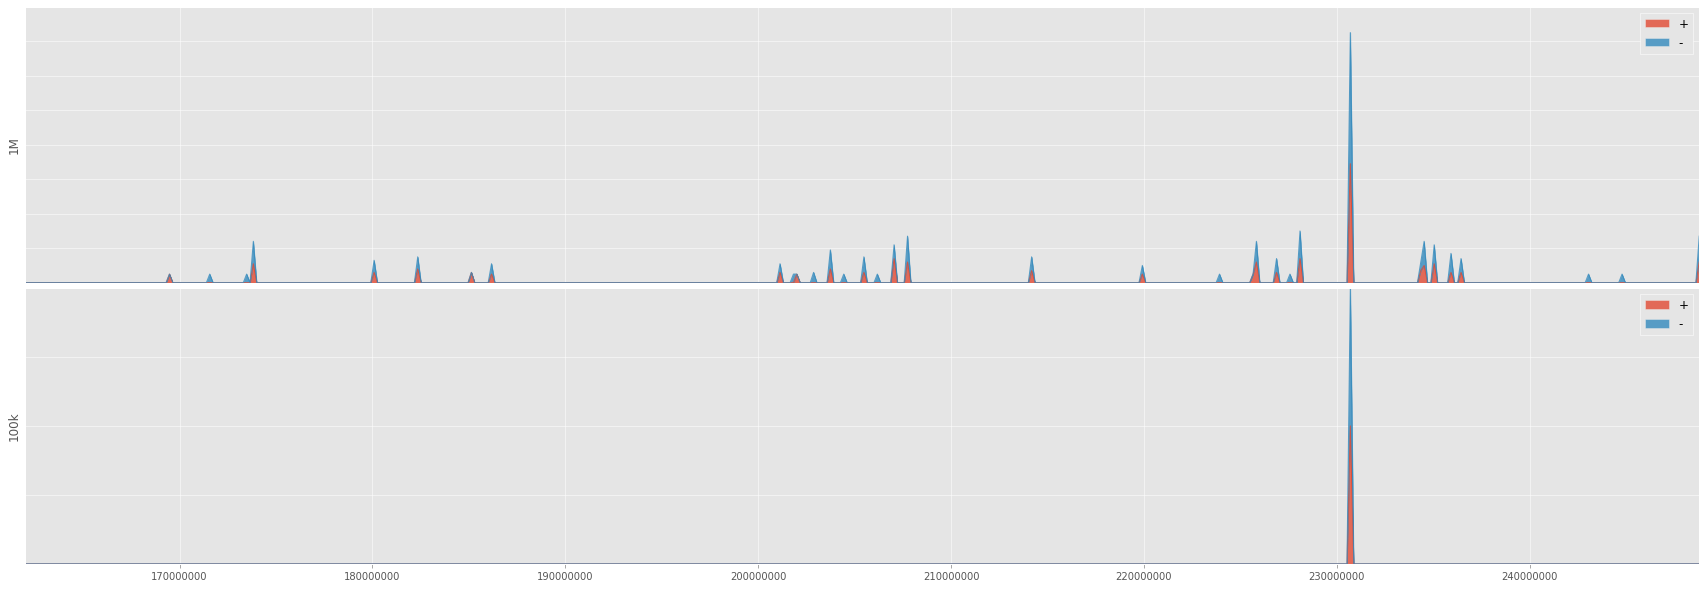

In [5]:
j.interval_plot(refid="chr1", start=162000000,figwidth=30)